In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv


In [2]:
df = pd.read_csv('/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# DATA PREPROCESSING

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#fill the missing values for numerical terms -- mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [7]:
#fill na values for categorical terms -- mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Explotatory Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

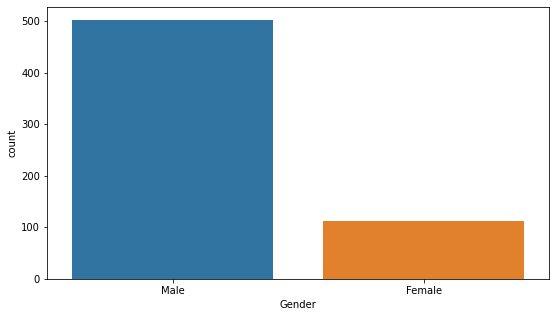

In [9]:
# categorical visualisation
plt.figure(figsize = (9,5))
sns.countplot(df['Gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Married', ylabel='count'>

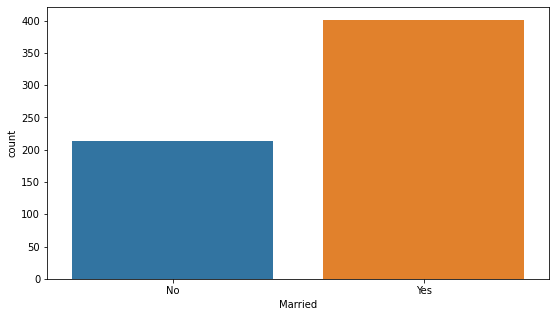

In [10]:
plt.figure(figsize = (9,5))
sns.countplot(df['Married'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dependents', ylabel='count'>

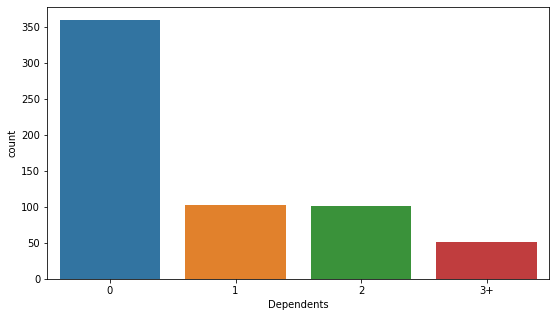

In [11]:
plt.figure(figsize = (9,5))
sns.countplot(df['Dependents'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

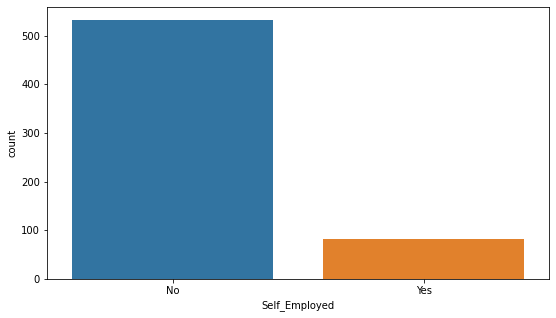

In [12]:
plt.figure(figsize = (9,5))
sns.countplot(df['Self_Employed'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Education', ylabel='count'>

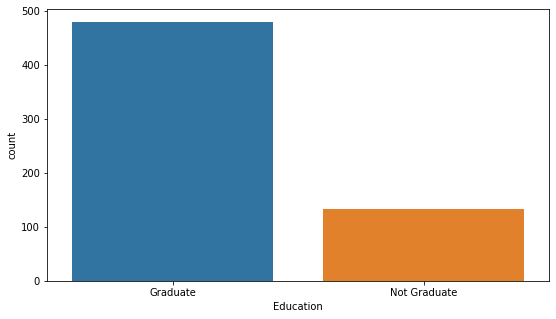

In [13]:
plt.figure(figsize = (9,5))
sns.countplot(df['Education'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

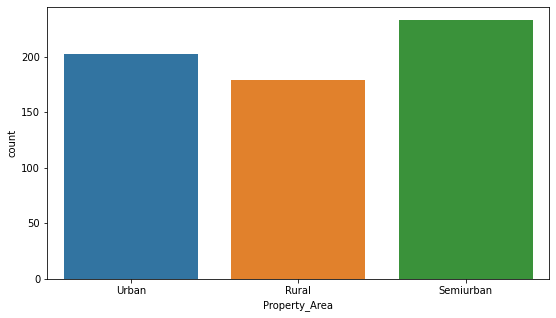

In [14]:
plt.figure(figsize = (9,5))
sns.countplot(df['Property_Area'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

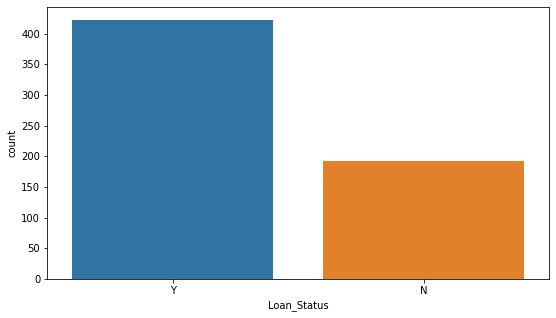

In [15]:
plt.figure(figsize = (9,5))
sns.countplot(df['Loan_Status'])

<Figure size 864x1080 with 0 Axes>

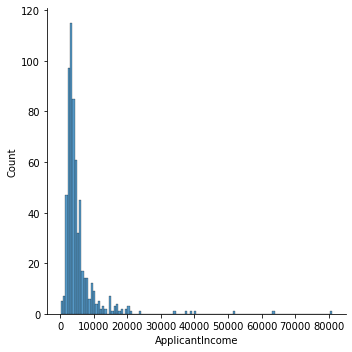

In [16]:
# numerical visualization
plt.figure(figsize = (12,15))
sns.displot(df['ApplicantIncome'])

In [17]:
#apply for transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

<Figure size 864x1080 with 0 Axes>

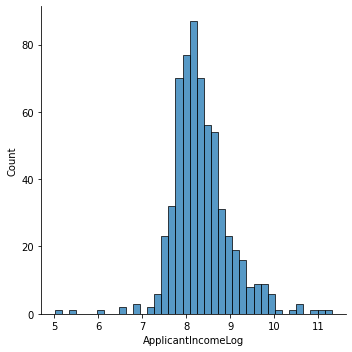

In [18]:
plt.figure(figsize = (12,15))
sns.displot(df['ApplicantIncomeLog'])

<Figure size 1152x1368 with 0 Axes>

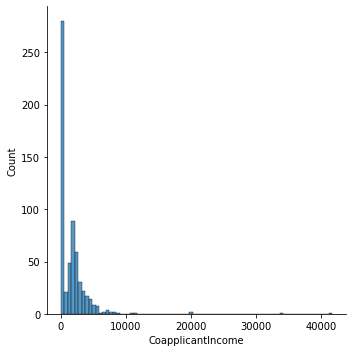

In [19]:

plt.figure(figsize = (16,19))
sns.displot(df['CoapplicantIncome'])

In [20]:
df['CoapplicantIncomeLog']= np.log(df['CoapplicantIncome']*100)



/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 864x1080 with 0 Axes>

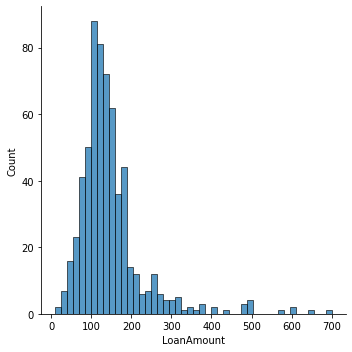

In [21]:
plt.figure(figsize = (12,15))
sns.displot(df['LoanAmount'])

In [22]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])

<Figure size 864x1080 with 0 Axes>

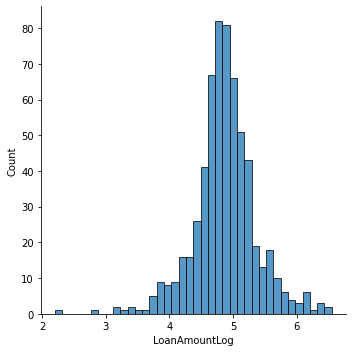

In [23]:
plt.figure(figsize = (12,15))
sns.displot(df['LoanAmountLog'])

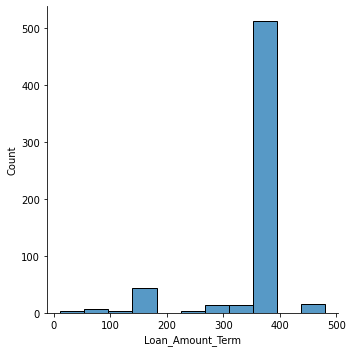

In [24]:
sns.displot(df['Loan_Amount_Term'])

In [25]:
df['Loan_Amount_TermLog']= np.log(df['Loan_Amount_Term'])

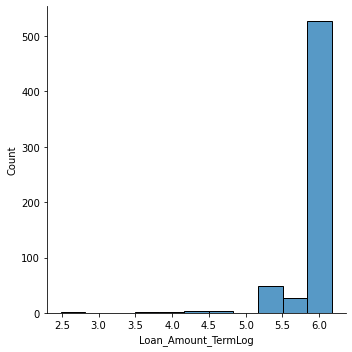

In [26]:
sns.displot(df['Loan_Amount_TermLog'])

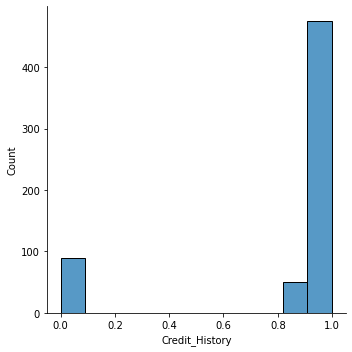

In [27]:
sns.displot(df['Credit_History'])

# creating new attributes

In [28]:
#total income 
df['Total_income'] = df['ApplicantIncome']+ df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,11.923710,4.852030,5.886104,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,5.886104,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,12.370739,4.787492,5.886104,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,5.886104,6000.0


In [29]:
df['Total_incomeLog']= np.log(df['Total_income'])

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_income,Total_incomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674026,-inf,4.986426,5.886104,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430109,11.923710,4.852030,5.886104,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006368,-inf,4.189655,5.886104,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.856707,12.370739,4.787492,5.886104,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699515,-inf,4.948760,5.886104,6000.0,8.699515


# Correlation matrix

In [31]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_income,Total_incomeLog
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.790532,0.108432,0.434849,-0.024085,0.893037,0.717829
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.237900,0.711061,0.204179,-0.042941,0.342781,0.383827
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.551556,0.417763,0.895324,0.044905,0.620102,0.687552
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.030739,-0.079338,0.086531,0.938871,-0.069830,-0.055320
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.019169,-0.063210,-0.025248,-0.007860,-0.014447,0.019156
ApplicantIncomeLog,0.790532,-0.237900,0.551556,-0.030739,0.019169,1.000000,0.021399,0.491066,-0.014618,0.639953,0.740300
CoapplicantIncomeLog,0.108432,0.711061,0.417763,-0.079338,-0.063210,0.021399,1.000000,0.393070,-0.055967,0.585476,0.649026
LoanAmountLog,0.434849,0.204179,0.895324,0.086531,-0.025248,0.491066,0.393070,1.000000,0.084534,0.503817,0.657507
Loan_Amount_TermLog,-0.024085,-0.042941,0.044905,0.938871,-0.007860,-0.014618,-0.055967,0.084534,1.000000,-0.042237,-0.029522
Total_income,0.893037,0.342781,0.620102,-0.069830,-0.014447,0.639953,0.585476,0.503817,-0.042237,1.000000,0.852873


<AxesSubplot:>

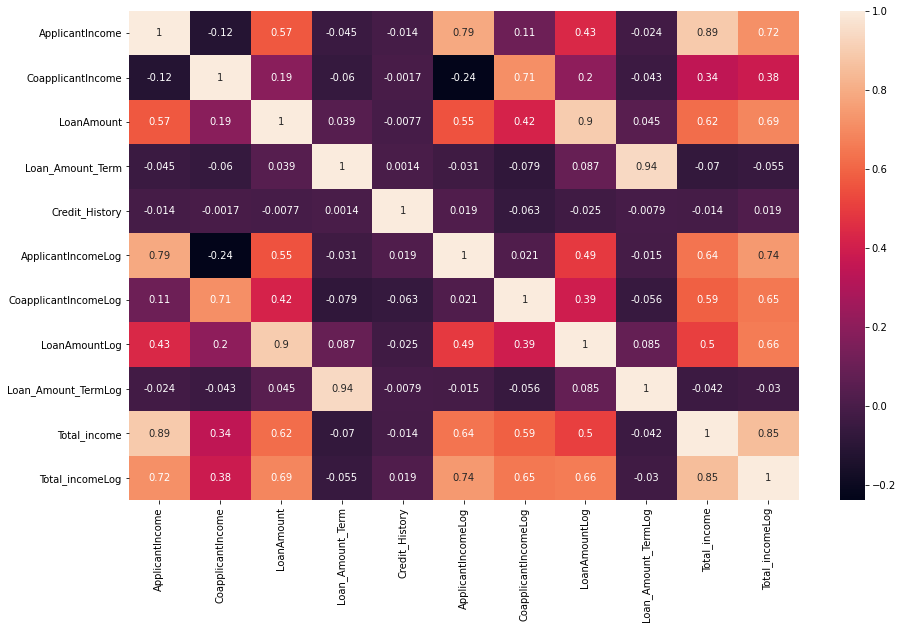

In [32]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

In [33]:
#drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'Total_income', 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns = cols, axis =1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_incomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']
le = LabelEncoder()
for col in cols:
    df[col]= le.fit_transform(df[col])

In [35]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_incomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train Test Split

In [36]:
x = df.drop(columns = ['Loan_Status'], axis = 1)
y = df['Loan_Status']


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=51)

# Model Selection

In [38]:
from sklearn.model_selection import cross_val_score
# define classify function
def classify(model,x,y):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=51)
    model.fit(x_train,y_train)
    print('Accuracy is ', model.score(x_test,y_test)*100)
    #cross_validation basically used for better validation of model
    score = cross_val_score(model,x,y,cv=5)
    print('cross_validation ', np.mean(score)*100)
    

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy is  84.4155844155844
cross_validation  80.9462881514061


In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy is  74.02597402597402
cross_validation  70.69039051046249


In [41]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy is  82.46753246753246
cross_validation  78.50326536052246


In [42]:
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy is  79.22077922077922
cross_validation  76.38944422231107


# Hyper parameter tuning

In [43]:
model = RandomForestClassifier(n_estimators=50,min_samples_split=18, max_depth=7, max_features=1)
classify(model,x,y)

Accuracy is  81.81818181818183
cross_validation  79.47887511662002


# Confusion Matrix

In [44]:
model =RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 20,  23],
       [  5, 106]])

<AxesSubplot:>

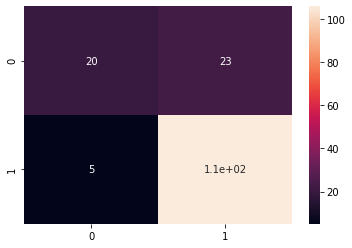

In [46]:
sns.heatmap(cm,annot=True)